In [1]:
from numpy import arange

In [2]:
from matplotlib import pyplot

In [3]:
colors = 'rbbcmyk'

In [10]:
def bar_chart(categories, words, counts):
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c%len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

In [5]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [7]:
import nltk
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals
)

In [8]:
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

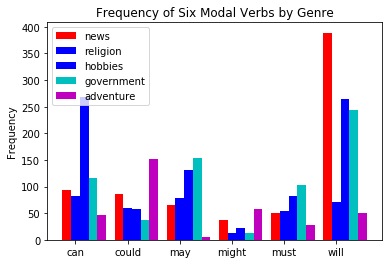

In [11]:
bar_chart(genres, modals, counts)

In [21]:
import networkx as nx

In [31]:
from networkx.drawing.nx_agraph import graphviz_layout

In [22]:
import matplotlib

In [23]:
from nltk.corpus import wordnet as wn

In [24]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

In [25]:
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

In [34]:
def graph_draw(graph):
    nx.draw(
        graph,
        pos=graphviz_layout(graph),
        node_size=[16*graph.degree(n) for n in graph],
        node_color =[graph.depth[n] for n in graph],
        with_labels=False
    )
    matplotlib.pyplot.show()

In [27]:
dog = wn.synset('dog.n.01')

In [28]:
graph = hyponym_graph(dog)

/home/user/.virtualenvs/solenie/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


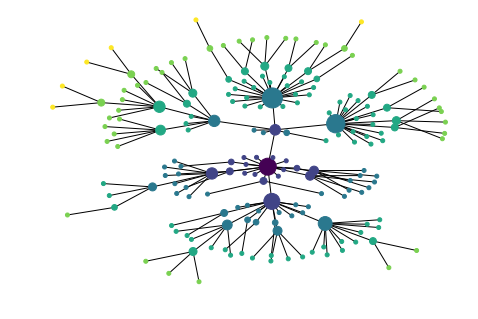

In [37]:
graph_draw(graph)